# Practical 9
## Understanding and Implementing Autoencoder 

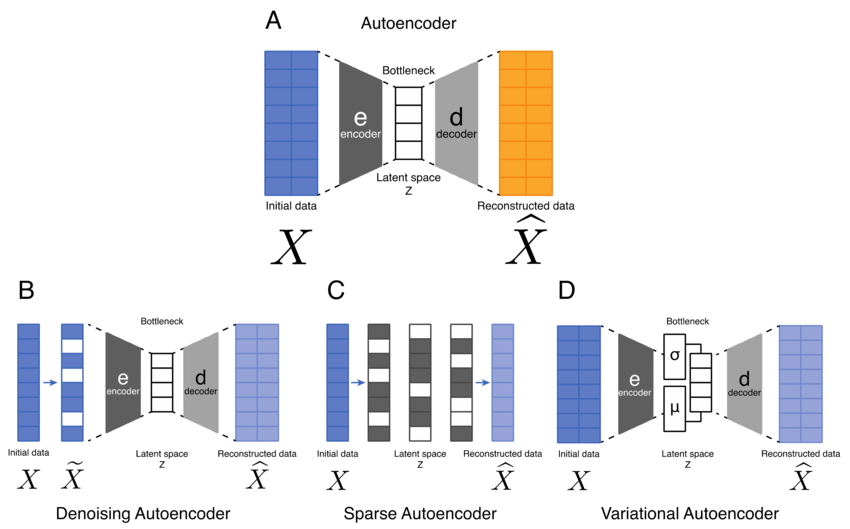
---

### 🔹 1. What is an Autoencoder?

An **Autoencoder (AE)** is a special type of **neural network** that learns to **compress (encode) data into a smaller representation** and then **reconstruct (decode) it back** to something close to the original input.

* **Encoder:** compresses input → latent (hidden) representation.
* **Decoder:** reconstructs the input from that latent representation.
* **Objective:** minimize the difference between input and output (usually Mean Squared Error or Cross-Entropy).

So, it’s like teaching the network:

> "Learn the most important features of the data, and throw away noise/unnecessary info."

---

### 🔹 2. Logic Behind It

Imagine you have a photo (say 28×28 = 784 pixels). Instead of memorizing all 784 values, an autoencoder might compress it into just **32 values (latent space)** that still capture the "essence" of the image.
Then the decoder expands those 32 values back into 784.

Training goal:
[
x &asymp; x&#x302; = Decoder(Encoder(x))
]



---

### 🔹 3. Uses of Autoencoders

1. **Dimensionality Reduction** (like PCA but nonlinear).
2. **Denoising** – train on noisy images, output clean ones.
3. **Anomaly Detection** – if reconstruction error is high → anomaly.
4. **Data Generation** – used in **Variational Autoencoders (VAEs)**.
5. **Feature Learning** – extract useful embeddings for other tasks.

---

### 🔹 4. Can Input Features be Doubled?


* Normally, the **output = input dimension** (so that you reconstruct what you fed).
* But if, you *can* design the decoder to **output more features than input** (like "expanding" features).

> However, then it’s **not a classic autoencoder** anymore. It becomes a **mapping/expansion network** (similar to feature engineering or generative models).

Example:

* Input = 10 features
* Latent = 4 features
* Decoder output = 20 features

This makes sense if your **target data really has 20 features** (e.g., input is partial, and you want to reconstruct full). Otherwise, it won’t be meaningful.

---

> **Summary:**

* Autoencoder = neural network for compressing + reconstructing data.
* Built with encoder + decoder.
* Used for dimensionality reduction, denoising, anomaly detection, representation learning.
* Output size is usually equal to input size, but *can be doubled* if the application requires (e.g., predicting missing/extra features).



---

### 🔹 5. Normal Autoencoder

Usually:

* Input = (n) features
* Latent = smaller (compressed)
* Output = (n) features (reconstruction)

Example: Input 10 → Latent 4 → Output 10

---

### 🔹 6. Expanding Autoencoder (a.k.a. “Feature Expansion” or “Overcomplete Decoder”)

Here:

* Input = (n) features
* Latent = smaller
* Output = **(m > n)** features

This is useful if:

* You want to **generate extra features** (e.g., imputing missing variables).
* You want to **map to a richer feature space** for downstream tasks.
* You’re doing a **sequence-to-sequence style problem** (like input → longer output).

---

### 🔹 7. Python Example: Expanding Autoencoder

Say input has **10 features** but you want the decoder to output **20 features**:

```python
import tensorflow as tf
from tensorflow.keras import layers, models

# Input has 10 features
input_dim = 10
latent_dim = 4
output_dim = 20  # expanded features

# Encoder
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(8, activation='relu')(inputs)
latent = layers.Dense(latent_dim, activation='relu')(encoded)

# Decoder (expands features)
decoded = layers.Dense(12, activation='relu')(latent)
outputs = layers.Dense(output_dim, activation='linear')(decoded)

# Build model
expander = models.Model(inputs, outputs)
expander.compile(optimizer='adam', loss='mse')
print(expander.summary())
```

---

### 🔹 8. Training It

* If you have **true labels of expanded features**, train with them:

  ```python
  expander.fit(x_train_10, y_train_20, epochs=20, batch_size=32)
  ```
* If you **don’t have labels** (unsupervised), you’ll need to define a rule for what the “expanded” features mean (e.g., polynomial expansion, embedding, predicted missing fields, etc.).

---

### 🔹 9. Intuition

Think of it as:

* Encoder learns **compact representation** (low-dim info).
* Decoder **generates extra information** → not just copying input, but **predicting or enriching features**.

In practice:

* For **structured data**: expand into synthetic features (like interactions).
* For **images**: small image → bigger image (super-resolution).
* For **text/sequence**: short sequence → longer sequence (translation, summarization).

---

👉 So, an autoencoder **can be modified into a feature expander** if the decoder’s final Dense layer has **more neurons than input dimension**.



---

### 🔹 10. Adding More Layers

* Autoencoders can have **multiple hidden layers** in both encoder and decoder.
* This is called a **deep autoencoder**.
* More layers allow the network to **learn more complex representations** of the data.

✅ Adding layers can improve the **representation power**, but too many layers may cause **overfitting** if you don’t have enough data.

---

### 🔹 11. Model Evaluation Concept in Autoencoders

* Unlike classification, autoencoders **don’t predict classes**, they **reconstruct inputs**.
* So, we **measure reconstruction quality**, not traditional “accuracy”.

**Common metrics:**

<h5>1. Mean Squared Error (MSE)</h5>
<p>
MSE = (1/n) Σ<sub>i=1</sub><sup>n</sup> (x<sub>i</sub> - x̂<sub>i</sub>)²
</p>
<p>
Lower MSE → better reconstruction.
</p>

<h5>2. Mean Absolute Error (MAE)</h5>
<p>
MAE = (1/n) Σ<sub>i=1</sub><sup>n</sup> |x<sub>i</sub> - x̂<sub>i</sub>|
</p>
<p>
Lower MAE → better reconstruction.
</p>


---

### 🔹 Summary

1. **more layers** → deep autoencoder → more complex features.
2. **Accuracy** is replaced by **reconstruction loss** (MSE, MAE) or **custom tolerance metrics**.
3. Adding layers + proper regularization = better latent features, but watch out for overfitting.

---

### 🔹 12. Main Idea: “Learning Compression”

An **autoencoder reduces size** by **forcing the data to pass through a smaller hidden (latent) layer** — also called a **bottleneck**.

Think of it like a funnel:

```
Input (large) → [Encoder] → Latent (small) → [Decoder] → Output (large)
```

* The **encoder** compresses the input into fewer dimensions (information bottleneck).
* The **decoder** tries to reconstruct the original input from that small representation.
* During training, the network learns which features are *essential* to preserve and which can be discarded.

---

### 🔹 13. The Logic Behind Size Reduction

Suppose your input has **100 features**, and you set your **latent space to 10** neurons.
That means the model must learn to **represent all 100 features using only 10 numbers**.

So instead of memorizing all 100, it tries to **find patterns, correlations, and structure** in the data — i.e., **dimensionality reduction**.

This works because most real-world data is **redundant or correlated**:

* In images, neighboring pixels are similar.
* In tabular data, some features are correlated (e.g., height ↔ weight).

The network learns to capture that redundancy and store the “essence” compactly.

---

### 🔹 14. Comparison with PCA

Autoencoder ≈ **nonlinear version of PCA**

| Concept     | PCA                   | Autoencoder                                 |
| ----------- | --------------------- | ------------------------------------------- |
| Type        | Linear                | Non-linear                                  |
| Learns from | Covariance matrix     | Neural network                              |
| Compression | Orthogonal projection | Learned mapping                             |
| Output      | Principal components  | Reconstructed input                         |
| Flexibility | Limited               | Very flexible (deep layers, nonlinearities) |

---
### 🔹 15. When Autoencoders Reduce Size Effectively

✅ Works best when:

* You have **structured or correlated** data.
* You use **nonlinear activations (ReLU, sigmoid, tanh)**.
* You **train on enough data** to capture general patterns.
* You apply **regularization** (dropout, sparsity, etc.) to prevent overfitting.

---

#### 🔹 Example Analogy

Imagine compressing a high-quality photo into a thumbnail:

* You lose some details, but still keep the key shapes and colors.
* That’s what an **autoencoder does** with data — keeps what matters most.

---

#### 🔹 Summary

| Step       | Role                          | Effect                               |
| ---------- | ----------------------------- | ------------------------------------ |
| Encoder    | Compress input → latent space | Reduces dimensionality               |
| Bottleneck | Smallest layer                | Forces compact representation        |
| Decoder    | Reconstructs original         | Learns useful compression mapping    |
| Output     | Reconstructed input           | Used to measure reconstruction error |


---

### 🔹 16. The “Bottleneck” — The Bridge

The **bottleneck layer** is the point of **maximum compression**:

* It’s where **size reduction** is achieved.
* The number of neurons here determines how much the model compresses the data.
* Smaller bottleneck → higher compression, more information loss risk.

---

### 🔹 17. Summary Table

| Process        | Part of Network | Typical Term                              | Purpose                      |
| -------------- | --------------- | ----------------------------------------- | ---------------------------- |
| Size Reduction | Encoder         | **Encoding / Compression**                | Learn compact representation |
| Bottleneck     | Middle Layer    | **Latent Space**                          | Store essential info         |
| Size Expansion | Decoder         | **Decoding / Reconstruction / Expansion** | Rebuild or generate data     |

---

### 🔹 18. Related Concepts (Advanced)

| Variant                           | Description                                                  |
| --------------------------------- | ------------------------------------------------------------ |
| **Undercomplete Autoencoder**     | Latent < Input → true compression (dimensionality reduction) |
| **Overcomplete Autoencoder**      | Latent ≥ Input → learns identity mapping (often regularized) |
| **Sparse Autoencoder**            | Uses sparsity constraints to learn efficient representations |
| **Denoising Autoencoder**         | Learns to reconstruct clean data from noisy input            |
| **Variational Autoencoder (VAE)** | Learns probabilistic latent space for data generation        |

---

✅ **So in simple terms:**

* **Size reduction** → *Encoding / Compression*
* **Size expansion** → *Decoding / Reconstruction / Expansion*


---

### 🔹 19. What Is the Latent Space?

In an autoencoder:

```
Input → [Encoder] → Latent space → [Decoder] → Output
```

The **latent space** (also called **bottleneck layer**) is:

* The **compressed representation** of your input data.
* A **dense vector** that encodes only the *most important features*.

For MNIST (handwritten digits), the latent space learns **abstract representations** like:

> “This number is round”, “has a loop”, “has vertical line”, etc.

---

### 🔹 20. How to Extract the Latent Space

From your autoencoder model, you can build a new model that goes **only up to the encoder part**.

Example (continuing from your MNIST code):

```python
# Extract encoder part (up to the latent layer)
encoder = models.Model(inputs=input_img, outputs=encoded)

# Encode test data
latent_vectors = encoder.predict(x_test)
print("Latent space shape:", latent_vectors.shape)
```

If your `encoding_dim = 64`,
and `x_test` has 10,000 samples,
then you’ll get:

```
Latent space shape: (10000, 64)
```

---

### 🔹 21. Visualizing the Latent Space

There are **3 ways** depending on the latent dimension:

---

#### (A) If latent_dim = 2

You can directly **plot the latent space**:

```python
encoding_dim = 2  # small latent space (for visualization)
# Rebuild your model using encoding_dim=2 and retrain first

latent = encoder.predict(x_test)
plt.figure(figsize=(8,6))
plt.scatter(latent[:, 0], latent[:, 1], c=_[:10000].flatten(), cmap='tab10')
plt.colorbar()
plt.title("Latent Space Visualization (2D)")
plt.xlabel("Latent dim 1")
plt.ylabel("Latent dim 2")
plt.show()
```

- Each point = one MNIST image.
Points with similar colors (digits) cluster together → shows **feature learning power**.

---

#### (B) If latent_dim > 2

Use **Dimensionality Reduction** (PCA, t-SNE, or UMAP) to reduce it to 2D/3D for visualization:

```python
from sklearn.manifold import TSNE

# Reduce 64D latent to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_vectors)

plt.figure(figsize=(8,6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=_[:10000].flatten(), cmap='tab10')
plt.colorbar()
plt.title("t-SNE Projection of Latent Space")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()
```

---

#### (C) Visualize Reconstructions from Latent

You can also **sample points** from the latent space and **decode** them:

```python
# Build decoder model separately
encoded_input = layers.Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2](encoded_input)
decoder_output = autoencoder.layers[-1](decoder_layer1)
decoder = models.Model(encoded_input, decoder_output)

# Sample random latent vectors
random_latent = np.random.normal(size=(10, encoding_dim))
generated_images = decoder.predict(random_latent)

# Plot generated digits
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.show()
```

That’s how you **see what’s hidden inside the latent space** — and what kind of patterns it has learned.

---

### 🔹 Summary

| Step                              | Purpose                                           |
| --------------------------------- | ------------------------------------------------- |
| **Extract encoder**               | Get the latent representations                    |
| **Visualize in 2D (if possible)** | See clusters of digits                            |
| **Use t-SNE/PCA**                 | Visualize high-dimensional latent space           |
| **Decode samples**                | See what each latent vector “means” in image form |

---

## 🔹22 What decides autoencoder architecture?

There’s **no single fixed rule**, but there are **strong design principles** based on the data type and your goal (compression, denoising, generation, etc.).

#### 🔹 Key factors:

| Factor                           | What it affects                                                                                     |
| -------------------------------- | --------------------------------------------------------------------------------------------------- |
| **Input dimension**              | Number of neurons in input/output layers.                                                           |
| **Latent dimension**             | How much you want to compress — smaller means stronger compression, but higher reconstruction loss. |
| **Data complexity**              | More complex data (like images) → deeper network.                                                   |
| **Noise tolerance / smoothness** | More layers and non-linearities help denoise and learn robust embeddings.                           |

---

### 🔹23 General rules of thumb

#### 🔸 Input → Encoder → Latent → Decoder → Output

* The **encoder** should **gradually reduce** the number of neurons per layer.
* The **decoder** should **mirror** the encoder (symmetry).

For example (for MNIST, input_dim=784):

```
Input (784)
↓
Dense(512, relu)
↓
Dense(256, relu)
↓
Dense(64, relu)
↓
Latent (2 or 16 or 32)
↓
Dense(64, relu)
↓
Dense(256, relu)
↓
Dense(512, relu)
↓
Output (784, sigmoid)
```

This pyramid-like structure helps the network learn hierarchical features.

---

### 🔹24 Latent size (compression)

| Goal                             | Latent size                         | Reason                         |
| -------------------------------- | ----------------------------------- | ------------------------------ |
| Visualization                    | 2 or 3                              | So you can plot it.            |
| Compression                      | ≪ input_dim                         | Forces compact representation. |
| Denoising                        | Similar to compression, but robust. |                                |
| Pretraining for downstream model | Intermediate (e.g., 32–128).        |                                |

---

### ⚙️ 25 Choosing activations

| Layer   | Recommended activation                             |
| ------- | -------------------------------------------------- |
| Encoder | ReLU, LeakyReLU                                    |
| Latent  | Linear (for visualization) or tanh                 |
| Decoder | ReLU or sigmoid (sigmoid if inputs normalized 0–1) |

---

### 📈 26 Evaluation — no “accuracy”

Autoencoders are **unsupervised**, so they don’t have accuracy.
Instead, measure:

* **Reconstruction loss** (MSE or binary crossentropy)
* **Visual quality** of reconstruction
* (Optionally) clustering quality in latent space

---

### 🧮 27 Heuristic shortcut:

```python
# Rough starting template
encoding_dim = input_dim // 8   # 8x compression
hidden_dims = [input_dim//2, input_dim//4]

# Encoder
for units in hidden_dims:
    x = Dense(units, activation='relu')(x)
latent = Dense(encoding_dim, activation='linear')(x)
# Decoder is mirror
```





### 🧮 28 There’s **no single universal formula**,

but there are **guiding quantitative heuristics** — i.e., *rules that behave like formulas.*

Autoencoder design depends on:

* **Input dimensionality** (`n_input`)
* **Desired compression ratio** (`r`)
* **Latent dimension size** (`n_latent`)
* **Depth / number of hidden layers**

---

### ⚙️ 29 Core design relation

#### 🔹 Latent size formula:


n<sub>latent</sub> = n<sub>input</sub>/r


where

* ( n<sub>input</sub> ) = number of input features (e.g. 784 for MNIST)
* ( r ) = compression ratio (e.g. 8 → 8× compression)

**Example:**
If input = 784, r = 8 → latent = 784 / 8 = 98 neurons.

For a strong compression (like visualization), fix ( n<sub>latent</sub> = 2 ) or 3.

---

#### 🔹 Hidden layers formula (geometric reduction)

A **smooth geometric decrease** in neuron count gives good results:


n<sub>hidden(i)</sub> = n<sub>input</sub>/{2<sup>i</sup>}


until you reach the latent size.

Example:

| Layer  | Formula             | Neurons (if input=784) |
| ------ | ------------------- | ---------------------- |
| h₁     | 784 / 2¹            | 392                    |
| h₂     | 784 / 2²            | 196                    |
| h₃     | 784 / 2³            | 98                     |
| Latent | 2 (chosen manually) | 2                      |

Then mirror this pattern for the decoder.

---

### 30 Practical thumb rules

| Component                 | Rule of thumb                                 |
| ------------------------- | --------------------------------------------- |
| **# of layers**           | 3–6 each side (encoder & decoder)             |
| **Compression ratio (r)** | 4–16 for normal; >16 for aggressive           |
| **Activation**            | ReLU for hidden, sigmoid/tanh for output      |
| **Latent dimension**      | ~log₂(n_input) or based on target compression |
| **Decoder**               | Mirror of encoder                             |

---

### 📈 31 Example heuristic generator (Python)

```python
def autoencoder_structure(n_input, compression_ratio=8, depth=3):
    import numpy as np
    latent_dim = int(n_input / compression_ratio)
    encoder_layers = [int(n_input / (2 ** i)) for i in range(1, depth + 1)]
    if encoder_layers[-1] < latent_dim:
        encoder_layers[-1] = latent_dim
    decoder_layers = encoder_layers[::-1]
    return {
        "encoder_layers": encoder_layers,
        "latent_dim": latent_dim,
        "decoder_layers": decoder_layers
    }

print(autoencoder_structure(784, compression_ratio=8, depth=3))
```

Example output:

```python
{'encoder_layers': [392, 196, 98], 'latent_dim': 98, 'decoder_layers': [98, 196, 392]}
```

Then feed this into a builder function dynamically.

---

## 🔍 32 Why no strict formula exists

Because the best architecture depends on:

* **Data distribution complexity**
* **Noise level**
* **Goal** (compression vs denoising vs generation)
* **Model type** (dense vs convolutional)

So formulas only give you **good starting points**, not guaranteed optimal values.Fine-tuning through experimentation (loss, reconstruction quality) is always needed.




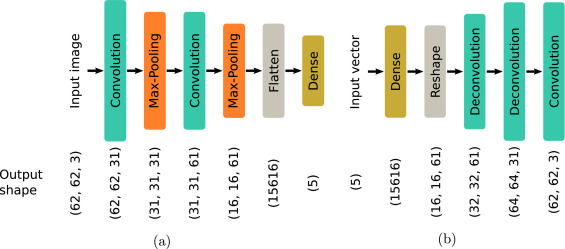
##### Dimensionality reduction through convolutional autoencoders for fracture patterns prediction

### Types of Autoencoder


<table border="1" cellpadding="5" cellspacing="0">
    <thead>
        <tr>
            <th>Type of Autoencoder</th>
            <th>Loss / Formula</th>
            <th>Key Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Vanilla</td>
            <td>MSE: L = ||X - X_hat||²</td>
            <td>Simple encoder-decoder</td>
        </tr>
        <tr>
            <td>Denoising (DAE)</td>
            <td>MSE/BCE: L = ||X - f(X + noise)||²</td>
            <td>Reconstructs clean input from noisy input</td>
        </tr>
        <tr>
            <td>Sparse</td>
            <td>L = ||X - X_hat||² + λ Σ KL(ρ || ρ_hat)</td>
            <td>Sparse hidden units to enforce feature selectivity</td>
        </tr>
        <tr>
            <td>Variational (VAE)</td>
            <td>L = Reconstruction loss + KL(q(z|X)||p(z))</td>
            <td>Probabilistic latent space; samples latent vector z</td>
        </tr>
        <tr>
            <td>Convolutional (CAE)</td>
            <td>MSE/BCE with convolutional layers</td>
            <td>Captures spatial structure in images</td>
        </tr>
        <tr>
            <td>Contractive</td>
            <td>L = ||X - X_hat||² + λ ||∂h/∂X||²</td>
            <td>Robust to small input variations; penalizes Jacobian</td>
        </tr>
        <tr>
            <td>Stacked</td>
            <td>MSE/BCE (layer-wise training)</td>
            <td>Multiple layers for hierarchical feature learning</td>
        </tr>
        <tr>
            <td>Undercomplete</td>
            <td>MSE: L = ||X - X_hat||², latent dim &lt; input dim</td>
            <td>Compressed latent space; forces compact representation</td>
        </tr>
        <tr>
            <td>Overcomplete</td>
            <td>MSE + sparsity penalty</td>
            <td>Latent dim ≥ input dim; can learn richer features</td>
        </tr>
    </tbody>
</table>


---

| Type of Autoencoder        | Advantages                         | Disadvantages                        | Applications / Uses                               |
|----------------------------|------------------------------------|--------------------------------------|--------------------------------------------------|
| Vanilla                    | Easy to implement                  | Limited generalization                | Dimensionality reduction, feature learning      |
| Denoising (DAE)            | Robust to noise                     | Needs noisy data                     | Image/signal denoising, robust features        |
| Sparse                     | Learns meaningful features          | Hard to tune sparsity                | Feature selection, anomaly detection           |
| Variational (VAE)          | Enables generative modeling         | More complex to train                 | Data synthesis, anomaly detection              |
| Convolutional (CAE)        | Good for images                     | More memory/computation              | Image compression, denoising, feature extraction |
| Contractive                 | Stable latent features               | Computationally expensive             | Robust feature learning, anomaly detection     |
| Stacked                     | Deep representations                 | Harder to train, may overfit         | Pretraining deep networks, feature extraction  |
| Undercomplete               | Forces compact representation        | May lose info if bottleneck too small | Dimensionality reduction, embeddings           |
| Overcomplete                | Richer feature learning              | Risk of identity mapping             | Feature learning, denoising, generative models |


---

#### **Explanation of key terms in formulas:**

* `X`: Original input
* `X_hat`: Reconstructed output
* `L`: Loss function
* `ρ`: Desired sparsity (for sparse AE)
* `ρ_hat`: Average activation of hidden units
* `D_KL`: Kullback-Leibler divergence (for VAE)
* `h`: Hidden representation
* `λ`: Regularization weight

MSE (Mean Squared Error): Measures squared difference between original input 
X and reconstructed output 
𝑋
'
.

BCE (Binary Cross-Entropy): Used for binary or normalized inputs.

KL Divergence: Measures difference between two probability distributions; used in VAE.

Contractive term: Penalizes large derivatives in latent space to enforce robustness.

---


### Latent Space = 30 & Batch Size = 15

Found 580 files belonging to 22 classes.


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 1024)           │    30,721,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_space (Dense)            │ (None, 30)             │         7,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 30000)          │    30,750,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,799,694 (239.56 MB)

 Trainable params: 62,799,694 (239.56 MB)

 Non-trainable params: 0 (0.00 B)

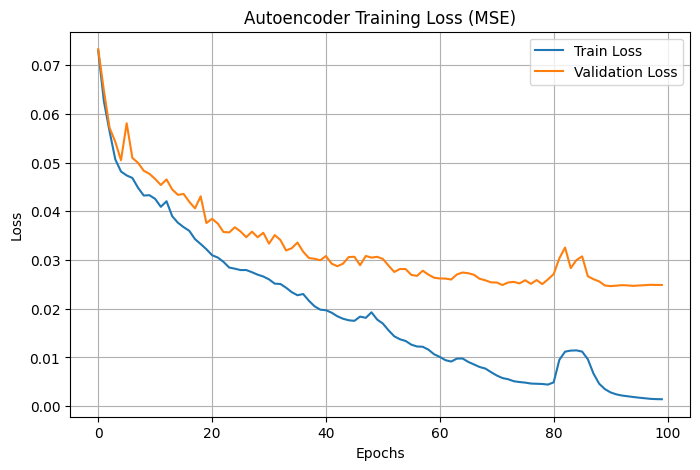

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


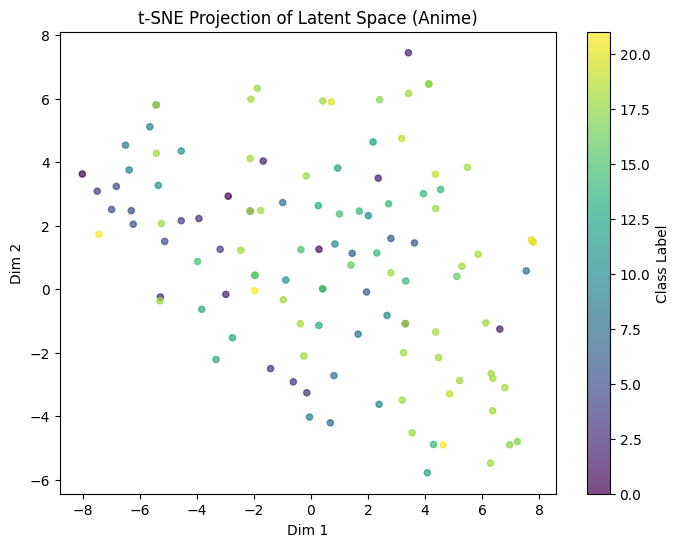

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


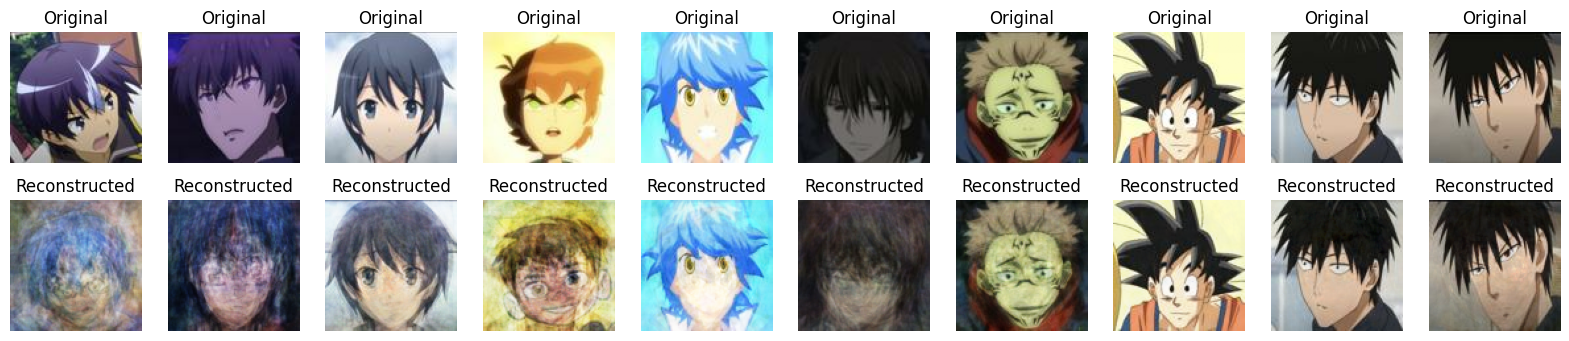

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# ============================================================
# 1. Load Anime Character Dataset
# ============================================================
img_size = 100
BATCH_SIZE = 15
LATENT_DIM = 30  # size of bottleneck
epochs = 100
dataset = tf.keras.utils.image_dataset_from_directory(
    "processed", 
    label_mode="categorical", 
    image_size=(img_size, img_size),
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Normalize to [0,1] instead of [-1,1] (for sigmoid output) ; for lable = none :: dataset = dataset.map(lambda x: x / 255.0)
# Keep labels unchanged
dataset = dataset.map(lambda x, y: (x / 255.0, y))

# Convert dataset to numpy arrays
images_list = []
labels_list = []

for batch in dataset:
    imgs, labels = batch
    images_list.append(imgs.numpy())
    labels_list.append(labels.numpy())

images = np.concatenate(images_list, axis=0)
labels = np.concatenate(labels_list, axis=0)

# Split into train/test
split_idx = int(0.8 * len(images))
x_train, x_test = images[:split_idx], images[split_idx:]
y_train, y_test = labels[:split_idx], labels[split_idx:]

# Flatten images for Dense autoencoder
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

'''# Combine into single NumPy array (for simplicity)
images = np.concatenate([x for x in dataset], axis=0)
x_train = images[:int(0.8*len(images))]
x_test = images[int(0.8*len(images)):]

# Flatten
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))'''

input_dim = img_size * img_size * 3  # 3 for RGB
encoding_dim = LATENT_DIM

# ============================================================
# 2. Build Autoencoder
# ============================================================
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(1024, activation='relu')(input_img)
encoded = layers.Dense(512, activation='relu')(encoded)
encoded = layers.Dense(256, activation='relu')(encoded)
#encoded = layers.Dense(128, activation='relu')(encoded)
latent = layers.Dense(encoding_dim, activation='linear', name="latent_space")(encoded)
#decoded = layers.Dense(128, activation='relu')(latent)
decoded = layers.Dense(256, activation='relu')(latent)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(1024, activation='relu')(decoded)
outputs = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, outputs)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
autoencoder.summary()

# ============================================================
# 3. Train Autoencoder
# ============================================================
history = autoencoder.fit(
    x_train, x_train,
    epochs=epochs, verbose=0,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# ============================================================
# 4. Plot Training Loss
# ============================================================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 5. Visualize Latent Space (t-SNE)
# ============================================================
encoder = models.Model(inputs=input_img, outputs=latent)
latent_vectors = encoder.predict(x_test)  # shape (num_samples, LATENT_DIM)

# Convert labels to integers if needed
if y_test.ndim > 1:
    y_test_int = np.argmax(y_test, axis=1)
else:
    y_test_int = y_test


# Optional PCA for speed
latent_dim_actual = latent_vectors.shape[1] if hasattr(latent_vectors, "shape") else LATENT_DIM
n_pca = min(latent_dim_actual, 50)
pca = PCA(n_components=n_pca)
latent_pca = pca.fit_transform(latent_vectors)

latent_2d = TSNE(n_components=2, random_state=42).fit_transform(latent_pca)

plt.figure(figsize=(8,6))
plt.scatter(latent_2d[:,0], latent_2d[:,1], c=y_test_int, cmap='viridis', s=20, alpha=0.7)
plt.colorbar(label="Class Label")
plt.title("t-SNE Projection of Latent Space (Anime)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

# ============================================================
# 6. Reconstruct and Compare
# ============================================================
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(img_size, img_size, 3))
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(img_size, img_size, 3))
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


### Latent Space = 300 & Batch Size = 32

Found 580 files belonging to 22 classes.


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1024)           │    30,721,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_space (Dense)            │ (None, 300)            │        77,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 256)            │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 30000)          │    30,750,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,938,204 (240.09 MB)

 Trainable params: 62,938,204 (240.09 MB)

 Non-trainable params: 0 (0.00 B)

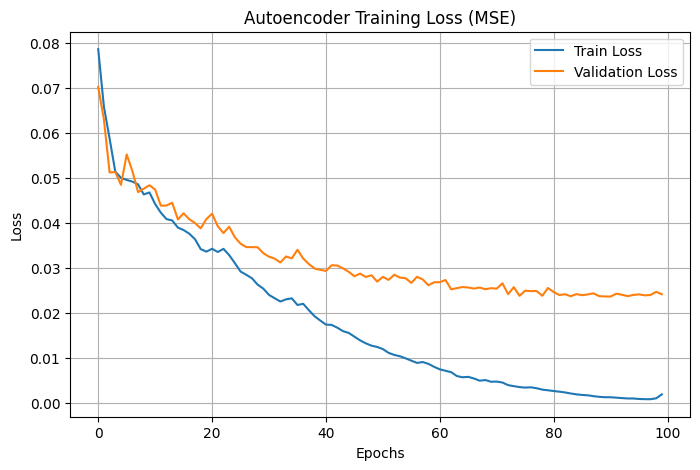

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


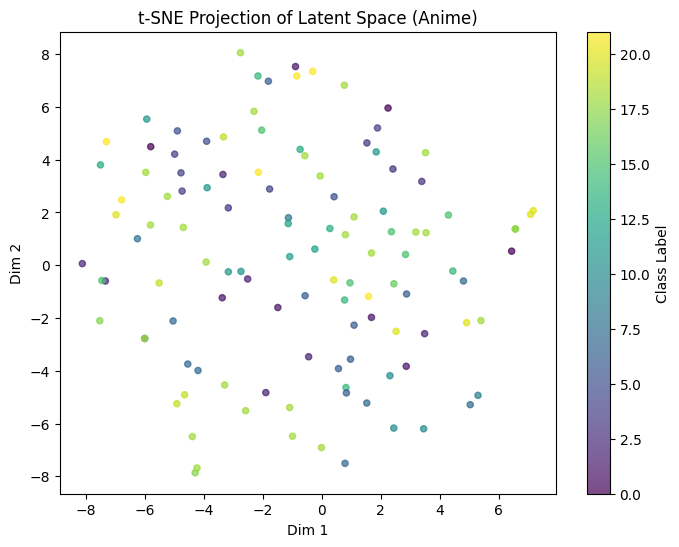

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


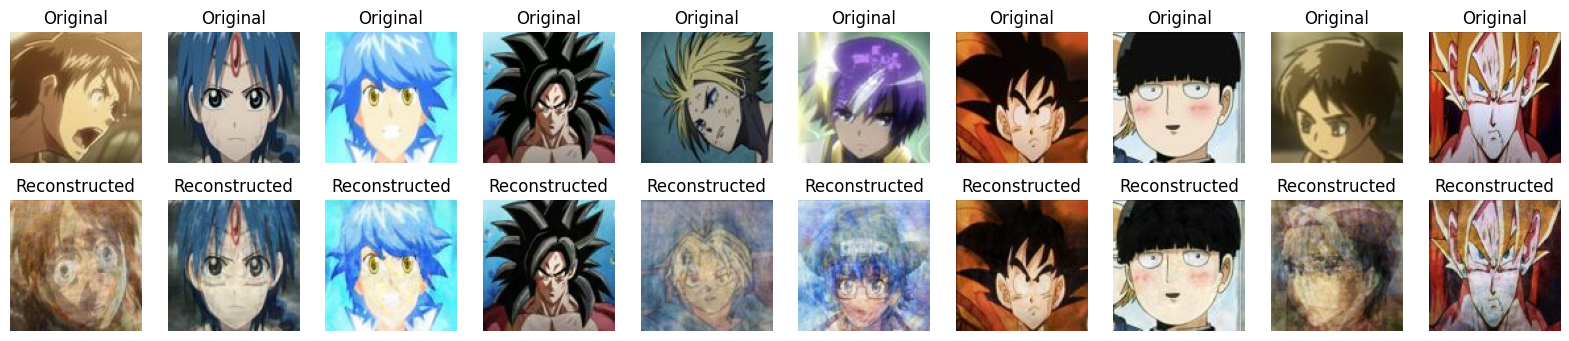

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# ============================================================
# 1. Load Anime Character Dataset
# ============================================================
img_size = 100
BATCH_SIZE = 32
LATENT_DIM = 300  # size of bottleneck
epochs = 100
dataset = tf.keras.utils.image_dataset_from_directory(
    "processed", 
    label_mode="categorical", 
    image_size=(img_size, img_size),
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Normalize to [0,1] instead of [-1,1] (for sigmoid output) ; for lable = none :: dataset = dataset.map(lambda x: x / 255.0)
# Keep labels unchanged
dataset = dataset.map(lambda x, y: (x / 255.0, y))

# Convert dataset to numpy arrays
images_list = []
labels_list = []

for batch in dataset:
    imgs, labels = batch
    images_list.append(imgs.numpy())
    labels_list.append(labels.numpy())

images = np.concatenate(images_list, axis=0)
labels = np.concatenate(labels_list, axis=0)

# Split into train/test
split_idx = int(0.8 * len(images))
x_train, x_test = images[:split_idx], images[split_idx:]
y_train, y_test = labels[:split_idx], labels[split_idx:]

# Flatten images for Dense autoencoder
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

'''# Combine into single NumPy array (for simplicity)
images = np.concatenate([x for x in dataset], axis=0)
x_train = images[:int(0.8*len(images))]
x_test = images[int(0.8*len(images)):]

# Flatten
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))'''

input_dim = img_size * img_size * 3  # 3 for RGB
encoding_dim = LATENT_DIM

# ============================================================
# 2. Build Autoencoder
# ============================================================
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(1024, activation='relu')(input_img)
encoded = layers.Dense(512, activation='relu')(encoded)
encoded = layers.Dense(256, activation='relu')(encoded)
#encoded = layers.Dense(128, activation='relu')(encoded)
latent = layers.Dense(encoding_dim, activation='linear', name="latent_space")(encoded)
#decoded = layers.Dense(128, activation='relu')(latent)
decoded = layers.Dense(256, activation='relu')(latent)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(1024, activation='relu')(decoded)
outputs = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, outputs)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
autoencoder.summary()

# ============================================================
# 3. Train Autoencoder
# ============================================================
history = autoencoder.fit(
    x_train, x_train,
    epochs=epochs, verbose=0,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# ============================================================
# 4. Plot Training Loss
# ============================================================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 5. Visualize Latent Space (t-SNE)
# ============================================================
encoder = models.Model(inputs=input_img, outputs=latent)
latent_vectors = encoder.predict(x_test)  # shape (num_samples, LATENT_DIM)

# Convert labels to integers if needed
if y_test.ndim > 1:
    y_test_int = np.argmax(y_test, axis=1)
else:
    y_test_int = y_test


# Optional PCA for speed
pca = PCA(n_components=50)
latent_pca = pca.fit_transform(latent_vectors)

latent_2d = TSNE(n_components=2, random_state=42).fit_transform(latent_pca)

plt.figure(figsize=(8,6))
plt.scatter(latent_2d[:,0], latent_2d[:,1], c=y_test_int, cmap='viridis', s=20, alpha=0.7)
plt.colorbar(label="Class Label")
plt.title("t-SNE Projection of Latent Space (Anime)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

# ============================================================
# 6. Reconstruct and Compare
# ============================================================
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(img_size, img_size, 3))
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(img_size, img_size, 3))
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


### Latent Space = 30 & Batch Size = 16

Found 580 files belonging to 22 classes.


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1024)           │    30,721,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_space (Dense)            │ (None, 30)             │         7,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 30000)          │    30,750,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,799,694 (239.56 MB)

 Trainable params: 62,799,694 (239.56 MB)

 Non-trainable params: 0 (0.00 B)

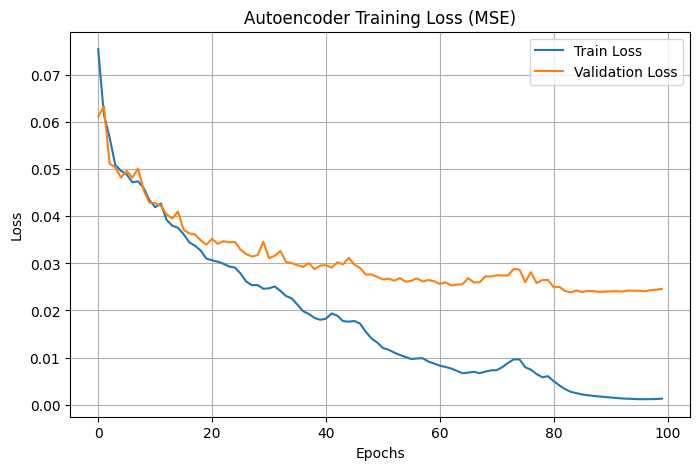

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


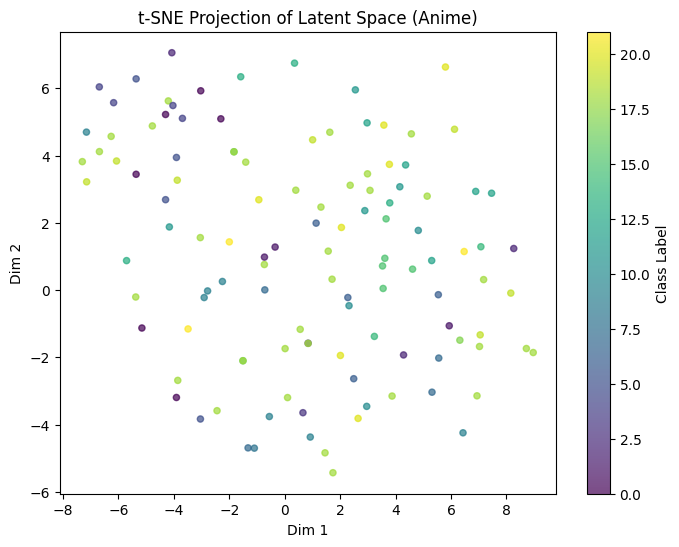

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


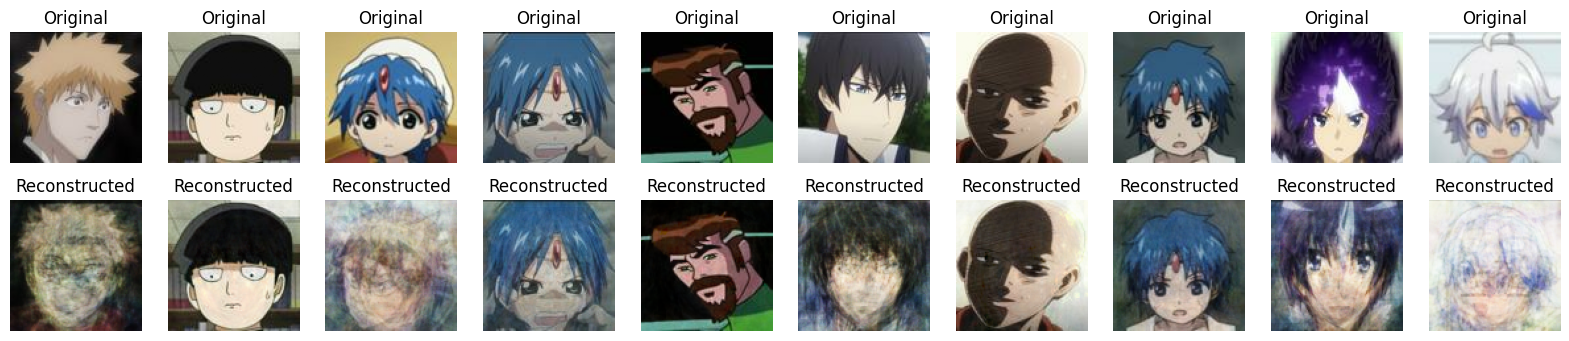

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# ============================================================
# 1. Load Anime Character Dataset
# ============================================================
img_size = 100
BATCH_SIZE = 16
LATENT_DIM = 30  # size of bottleneck
epochs = 100
dataset = tf.keras.utils.image_dataset_from_directory(
    "processed", 
    label_mode="categorical", 
    image_size=(img_size, img_size),
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Normalize to [0,1] instead of [-1,1] (for sigmoid output)
dataset = dataset.map(lambda x, y: (x / 255.0, y))

# Convert dataset to numpy arrays
images_list = []
labels_list = []

for batch in dataset:
    imgs, labels = batch
    images_list.append(imgs.numpy())
    labels_list.append(labels.numpy())

images = np.concatenate(images_list, axis=0)
labels = np.concatenate(labels_list, axis=0)

# Split into train/test
split_idx = int(0.8 * len(images))
x_train, x_test = images[:split_idx], images[split_idx:]
y_train, y_test = labels[:split_idx], labels[split_idx:]

# Flatten images for Dense autoencoder
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

input_dim = img_size * img_size * 3  # 3 for RGB
encoding_dim = LATENT_DIM

# ============================================================
# 2. Build Autoencoder
# ============================================================
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(1024, activation='relu')(input_img)
encoded = layers.Dense(512, activation='relu')(encoded)
encoded = layers.Dense(256, activation='relu')(encoded)
#encoded = layers.Dense(128, activation='relu')(encoded)
latent = layers.Dense(encoding_dim, activation='linear', name="latent_space")(encoded)
#decoded = layers.Dense(128, activation='relu')(latent)
decoded = layers.Dense(256, activation='relu')(latent)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(1024, activation='relu')(decoded)
outputs = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, outputs)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
autoencoder.summary()

# ============================================================
# 3. Train Autoencoder
# ============================================================
history = autoencoder.fit(
    x_train, x_train,
    epochs=epochs,verbose=0,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# ============================================================
# 4. Plot Training Loss
# ============================================================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 5. Visualize Latent Space (t-SNE)
# ============================================================
encoder = models.Model(inputs=input_img, outputs=latent)
latent_vectors = encoder.predict(x_test)  # shape (num_samples, LATENT_DIM)

# Convert labels to integers if needed
if y_test.ndim > 1:
    y_test_int = np.argmax(y_test, axis=1)
else:
    y_test_int = y_test


# Optional PCA for speed
# determine a safe number of PCA components: at most the latent dimensionality,
# and cap to a reasonable value (e.g. 50) for t-SNE performance
latent_dim_actual = latent_vectors.shape[1] if hasattr(latent_vectors, "shape") else LATENT_DIM
n_pca = min(latent_dim_actual, 50)
pca = PCA(n_components=n_pca)
latent_pca = pca.fit_transform(latent_vectors)

latent_2d = TSNE(n_components=2, random_state=42).fit_transform(latent_pca)

plt.figure(figsize=(8,6))
plt.scatter(latent_2d[:,0], latent_2d[:,1], c=y_test_int, cmap='viridis', s=20, alpha=0.7)
plt.colorbar(label="Class Label")
plt.title("t-SNE Projection of Latent Space (Anime)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

# ============================================================
# 6. Reconstruct and Compare
# ============================================================
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(img_size, img_size, 3))
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(img_size, img_size, 3))
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()
